# Sentiment Analysis of Financial News Headlines


### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix

## 1. Download the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = "/content/drive/MyDrive/My AI Projects/Financial News Sentiment analysis/financial_news_headlines_sentiment.csv"

In [ ]:
! pip install plotly

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load the dataset

In [ ]:
data = pd.read_csv(data, encoding='latin1')
data.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 3. Explore the dataset

In [ ]:
print(data.columns)
print(data.head())
print(data.shape)

Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')
    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                               

In [ ]:
data.columns = ['sentiment', 'headline']
print(data.head())

  sentiment                                           headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 4. Clean the data

In [ ]:
print("Missing values in each column:\n", data.isnull().sum())
data.head()

Missing values in each column:
 sentiment    0
headline     0
dtype: int64


,sentiment,headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
data.dropna(subset=['headline', 'sentiment'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,sentiment,headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
data['headline'] = data['headline'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
print("Data after cleaning:\n", data.head())

Data after cleaning:
   sentiment                                           headline
0   neutral  technopolis plans to develop in stages an area...
1  negative  the international electronic industry company ...
2  positive  with the new production plant the company woul...
3  positive  according to the company s updated strategy fo...
4  positive  financing of aspocomp s growth aspocomp is agg...


## 5. SMOTE (Imbalanced dataset)
Hint: Use **imblearn** library

In [ ]:
!pip install -q imbalanced-learn

## 6. BoW model

In [ ]:
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(data['headline'])
print("Shape of Bag of Words matrix:", X_bow.shape)

Shape of Bag of Words matrix: (4845, 1000)


## 7. Tf-idf model

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(data['headline'])
print("Shape of TF-IDF matrix:", X_tfidf.shape)

Shape of TF-IDF matrix: (4845, 1000)


## 8. Split train test data

In [ ]:
y = data['sentiment']
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## 9. Classification Algorithm
- Train
- Predict

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)
y_pred_bow_nb = nb_classifier.predict(X_test_bow)

nb_classifier.fit(X_train_tfidf, y_train)
y_pred_tfidf_nb = nb_classifier.predict(X_test_tfidf)

## 10. Another Classification Algorithm
- Train
- Predict

In [ ]:
lr_classifier = LogisticRegression(max_iter=1000)

lr_classifier.fit(X_train_bow, y_train)
y_pred_bow_lr = lr_classifier.predict(X_test_bow)

lr_classifier.fit(X_train_tfidf, y_train)
y_pred_tfidf_lr = lr_classifier.predict(X_test_tfidf)

## 11. Confusion Matrixes

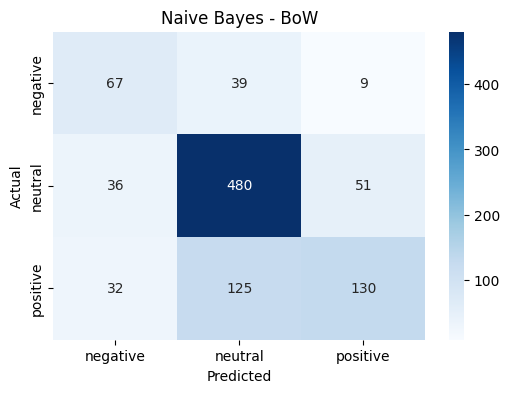

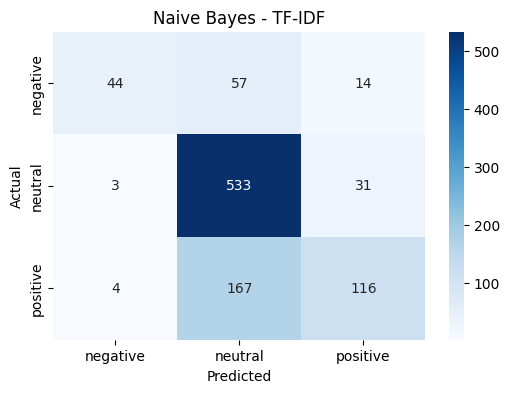

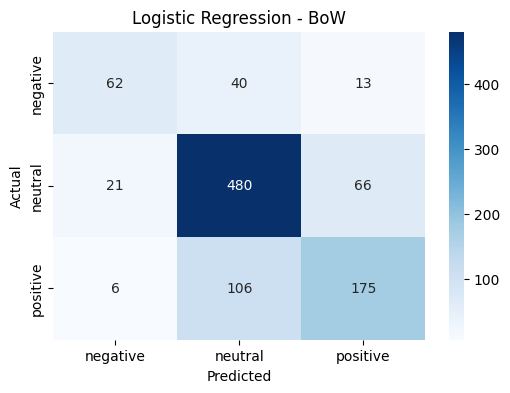

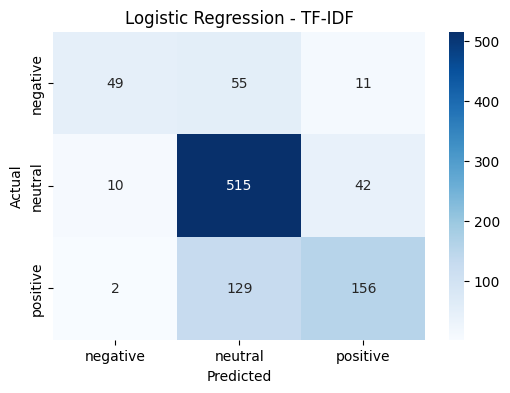

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_bow_nb, "Naive Bayes - BoW")
plot_confusion_matrix(y_test, y_pred_tfidf_nb, "Naive Bayes - TF-IDF")
plot_confusion_matrix(y_test, y_pred_bow_lr, "Logistic Regression - BoW")
plot_confusion_matrix(y_test, y_pred_tfidf_lr, "Logistic Regression - TF-IDF")